In [1]:
import sys

import sklearn

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(2022)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from plot_helper import discrete_scatter

What if there are categorical variables in the data?

use one-hot encoding we've learned in week 2: data_dummies = pd.get_dummies(data)

# Clustering

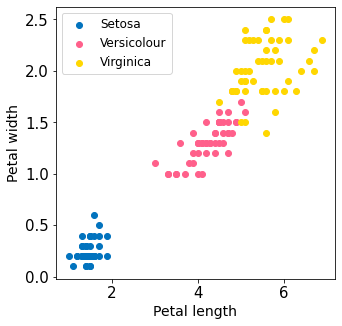

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(X[y == 0, 2], X[y == 0, 3], color="#0273BE", label='Setosa')
ax.scatter(X[y == 1, 2], X[y == 1, 3], color="#FF608B", label='Versicolour')
ax.scatter(X[y == 2, 2], X[y == 2, 3], color='#FFD700', label='Virginica')

ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.legend(fontsize=12)

## K-means

A demo for K-means algorithm

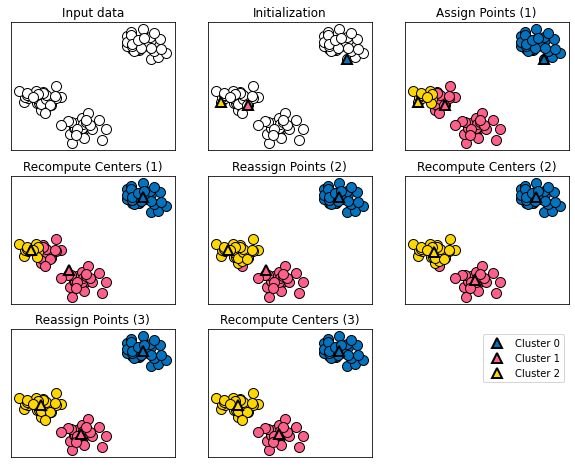

In [3]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from plot_helper import discrete_scatter

X, y = make_blobs(random_state=1)
# we don't want cyan in there
with mpl.rc_context(rc={'axes.prop_cycle': cycler('color', ["#0273BE","#FF608B",
                                                            '#FFD700'])}):
    fig, axes = plt.subplots(3, 3, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
    axes = axes.ravel()
    axes[0].set_title("Input data")
    discrete_scatter(X[:, 0], X[:, 1], ax=axes[0], markers=['o'], c='w')

    axes[1].set_title("Initialization")
    init = X[:3, :]
    discrete_scatter(X[:, 0], X[:, 1], ax=axes[1], markers=['o'], c='w')
    discrete_scatter(init[:, 0], init[:, 1], [0, 1, 2], ax=axes[1],
                     markers=['^'], markeredgewidth=2)

    axes[2].set_title("Assign Points (1)")
    km = KMeans(n_clusters=3, init=init, max_iter=1, n_init=1).fit(X)
    centers = km.cluster_centers_
    # need to compute labels by hand. scikit-learn does two e-steps for max_iter=1
    # (and it's totally my fault)
    labels = np.argmin(pairwise_distances(init, X), axis=0)
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[2])
    discrete_scatter(init[:, 0], init[:, 1], [0, 1, 2],
                     ax=axes[2], markers=['^'], markeredgewidth=2)

    axes[3].set_title("Recompute Centers (1)")
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[3])
    discrete_scatter(centers[:, 0], centers[:, 1], [0, 1, 2],
                     ax=axes[3], markers=['^'], markeredgewidth=2)

    axes[4].set_title("Reassign Points (2)")
    km = KMeans(n_clusters=3, init=init, max_iter=1, n_init=1).fit(X)
    labels = km.labels_
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[4])
    discrete_scatter(centers[:, 0], centers[:, 1], [0, 1, 2],
                     ax=axes[4], markers=['^'], markeredgewidth=2)

    km = KMeans(n_clusters=3, init=init, max_iter=2, n_init=1).fit(X)
    axes[5].set_title("Recompute Centers (2)")
    centers = km.cluster_centers_
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[5])
    discrete_scatter(centers[:, 0], centers[:, 1], [0, 1, 2],
                     ax=axes[5], markers=['^'], markeredgewidth=2)

    axes[6].set_title("Reassign Points (3)")
    labels = km.labels_
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[6])
    markers = discrete_scatter(centers[:, 0], centers[:, 1], [0, 1, 2],
                               ax=axes[6], markers=['^'],
                               markeredgewidth=2)

    axes[7].set_title("Recompute Centers (3)")
    km = KMeans(n_clusters=3, init=init, max_iter=3, n_init=1).fit(X)
    centers = km.cluster_centers_
    discrete_scatter(X[:, 0], X[:, 1], labels, markers=['o'],
                     ax=axes[7])
    discrete_scatter(centers[:, 0], centers[:, 1], [0, 1, 2],
                     ax=axes[7], markers=['^'], markeredgewidth=2)
    axes[8].set_axis_off()
    axes[8].legend(markers, ["Cluster 0", "Cluster 1", "Cluster 2"], loc='best')

K-means boundaries

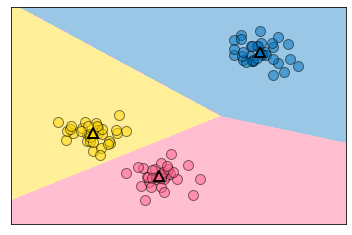

In [4]:
from plot_2d_separator import plot_2d_classification
from plot_helper import cm3

with mpl.rc_context(rc={'axes.prop_cycle': cycler('color', ["#0273BE","#FF608B",
                                                            '#FFD700'])}):
    X, y = make_blobs(random_state=1)
    init = X[:3, :]
    km = KMeans(n_clusters=3, init=init, max_iter=2, n_init=1).fit(X)
    discrete_scatter(X[:, 0], X[:, 1], km.labels_, markers=['o'], alpha=0.5)
    discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                     [0, 1, 2], markers=['^'], markeredgewidth=2)
    plot_2d_classification(km, X, cm=cm3, alpha=.4)

simple example

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


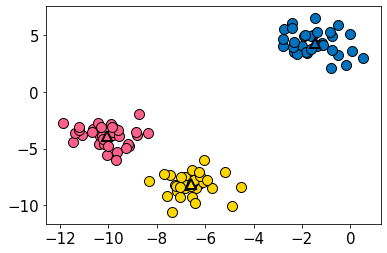

In [8]:
with mpl.rc_context(rc={'axes.prop_cycle': cycler('color', ["#0273BE","#FF608B",
                                                            '#FFD700'])}):
    discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
    discrete_scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
        markers='^', markeredgewidth=2)

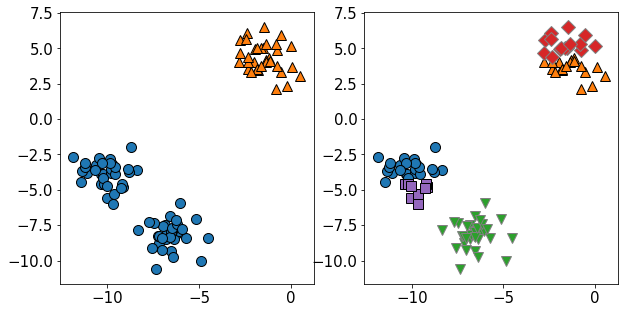

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

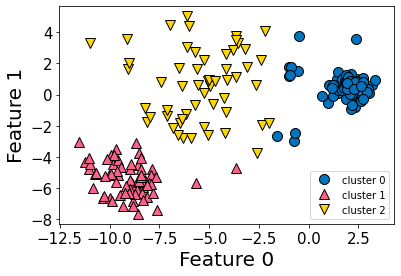

In [10]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

with mpl.rc_context(rc={'axes.prop_cycle': cycler('color', ["#0273BE","#FF608B",
                                                            '#FFD700'])}):
    discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
    plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

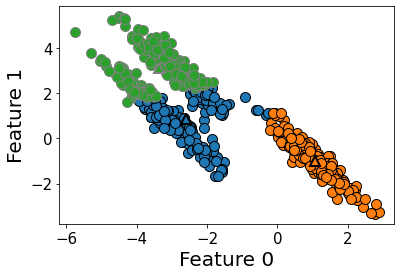

In [11]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

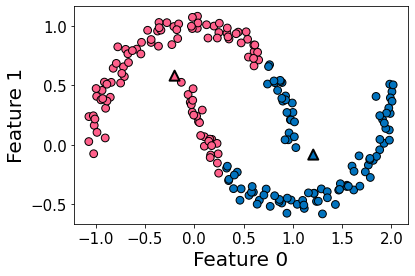

In [12]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
from plot_helper import cm2

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[cm2(0), cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## load Zoo dataset

In [13]:
from sklearn.cluster import KMeans
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import sys

df=pd.read_csv('zoo.csv', sep=",")
df.head()

,animal-name,hair,feathers,egg,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

generate data for kmeans algorithm

In [15]:
X = df.drop(columns=['animal-name','type']).to_numpy()
y = df['type'].to_numpy()

Each instance was assigned to one of the 5 clusters:

In [16]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [17]:
y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

In [18]:
y_pred

array([0, 0, 6, 0, 0, 0, 0, 6, 6, 0, 0, 3, 6, 1, 2, 4, 3, 0, 6, 6, 3, 3,
       0, 3, 4, 2, 2, 5, 0, 5, 4, 0, 5, 3, 6, 0, 0, 3, 6, 4, 4, 3, 4, 3,
       0, 0, 4, 0, 0, 0, 0, 4, 2, 4, 0, 0, 3, 3, 3, 3, 6, 6, 1, 0, 0, 0,
       6, 0, 0, 0, 0, 3, 4, 6, 6, 5, 6, 1, 3, 3, 1, 1, 6, 3, 5, 4, 6, 3,
       4, 2, 2, 2, 6, 5, 0, 3, 5, 4, 0, 1, 3])

And the following 5 centroids (i.e., cluster centers) were estimated:

In [19]:
kmeans.cluster_centers_

array([[ 1.00000000e+00, -8.32667268e-17,  3.22580645e-02,
         1.00000000e+00, -1.66533454e-16,  6.45161290e-02,
         5.48387097e-01,  9.67741935e-01,  1.00000000e+00,
         1.00000000e+00, -2.77555756e-17, -5.55111512e-17,
         4.00000000e+00,  9.03225806e-01,  2.25806452e-01,
         8.06451613e-01],
       [ 0.00000000e+00,  2.77555756e-17,  1.00000000e+00,
         5.55111512e-17,  0.00000000e+00,  1.66666667e-01,
         6.66666667e-01,  3.33333333e-01,  3.33333333e-01,
         6.66666667e-01,  3.33333333e-01,  2.77555756e-17,
         0.00000000e+00,  3.33333333e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.77555756e-17,  1.00000000e+00,
         5.55111512e-17,  0.00000000e+00,  7.14285714e-01,
         7.14285714e-01,  7.14285714e-01,  8.57142857e-01,
         8.57142857e-01,  1.42857143e-01,  2.77555756e-17,
         4.00000000e+00,  4.28571429e-01,  0.00000000e+00,
         1.42857143e-01],
       [-1.66533454e-16,  1.00000000e

Note that the KMeans instance preserves the labels of the instances it was trained on. Somewhat confusingly, in this context, the label of an instance is the index of the cluster that instance gets assigned to:

In [20]:
kmeans.labels_

array([0, 0, 6, 0, 0, 0, 0, 6, 6, 0, 0, 3, 6, 1, 2, 4, 3, 0, 6, 6, 3, 3,
       0, 3, 4, 2, 2, 5, 0, 5, 4, 0, 5, 3, 6, 0, 0, 3, 6, 4, 4, 3, 4, 3,
       0, 0, 4, 0, 0, 0, 0, 4, 2, 4, 0, 0, 3, 3, 3, 3, 6, 6, 1, 0, 0, 0,
       6, 0, 0, 0, 0, 3, 4, 6, 6, 5, 6, 1, 3, 3, 1, 1, 6, 3, 5, 4, 6, 3,
       4, 2, 2, 2, 6, 5, 0, 3, 5, 4, 0, 1, 3])

Of course, we can predict the labels of new instances:

In [21]:
X_new = X[0:3,] # extract the first 3 rows in X
kmeans.predict(X_new)

array([0, 0, 6])

## PCA for the original data

In [22]:
from sklearn import decomposition
from sklearn.decomposition import PCA

# Using PCA from sklearn PCA
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

### display clustering results on 2D space

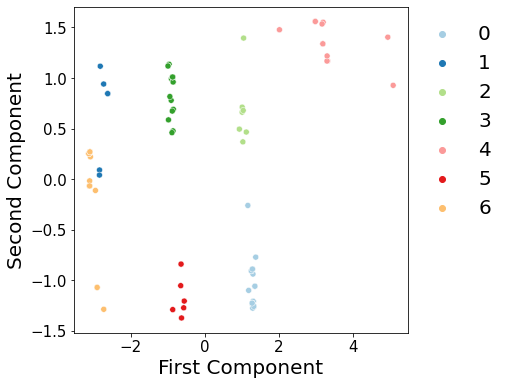

In [23]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.linewidth'] = 1

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette='Paired', ax=ax)

ax.set_xlabel("First Component", fontsize=20)
ax.set_ylabel("Second Component", fontsize=20)

ax.legend(frameon=False, 
          loc= 1, 
          bbox_to_anchor=(1.3, 1), 
          fontsize=20)

### Hard Clustering vs Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called hard clustering, it might be better measure the distance of each instance to all 5 centroids. This is what the transform() method does:

In [24]:
kmeans.transform(X_new)

array([[1.05568182, 4.62180821, 2.15709555, 3.3977934 , 3.30411255,
        2.31234487, 4.69225969],
       [0.63622848, 4.69337595, 2.28571429, 3.23187252, 3.41853631,
        2.11891385, 4.65449888],
       [4.76732287, 1.92209377, 4.28571429, 3.08949834, 6.65595787,
        3.23879544, 0.60847532]])

### Intertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the inertia metric:

In [25]:
kmeans.inertia_

120.16775166642333

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [26]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

120.1677516664234

The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "greater is better" rule.

In [ ]:
kmeans.score(X)

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure:

In [27]:
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1,
                         algorithm="full", random_state=5)

In [28]:
y_rnd_init1 = kmeans_rnd_init1.fit_predict(X)
y_rnd_init2 = kmeans_rnd_init2.fit_predict(X)

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
np.allclose(y_rnd_init1, y_rnd_init2)

False

In [ ]:
kmeans_rnd_init1.inertia_

In [30]:
kmeans_rnd_init2.inertia_

144.26734800200276

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the n_init hyperparameter, Scikit-Learn runs the original algorithm n_init times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets n_init=10.

In [31]:
kmeans_rnd_10_inits = KMeans(n_clusters=k, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

kmeans_rnd_10_inits.inertia_  ##better than 1 init

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


134.653947368421

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 7?

In [ ]:
kmeans_k5 = KMeans(n_clusters=5, random_state=42)
kmeans_k9 = KMeans(n_clusters=9, random_state=42)

y_k5 = kmeans_k5.fit_predict(X)
y_k9 = kmeans_k9.fit_predict(X)

In [ ]:
kmeans_k5.inertia_

In [ ]:
kmeans_k9.inertia_

No, we cannot simply take the value of  that minimizes the inertia, since it keeps getting lower as we increase . Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of  and analyze the resulting curve:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(7, inertias[6]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to  where  is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and  is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes , excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

As you can see, this visualization is much richer than the previous one

# Hierarchical Clustering and Dendrograms

Text(0, 0.5, 'Cluster distance')

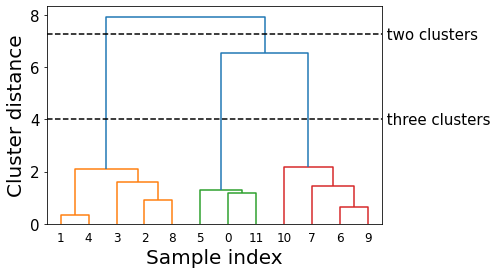

In [4]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = linkage(X,'ward')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [5]:
## Iris
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

Text(0, 0.5, 'Cluster distance')

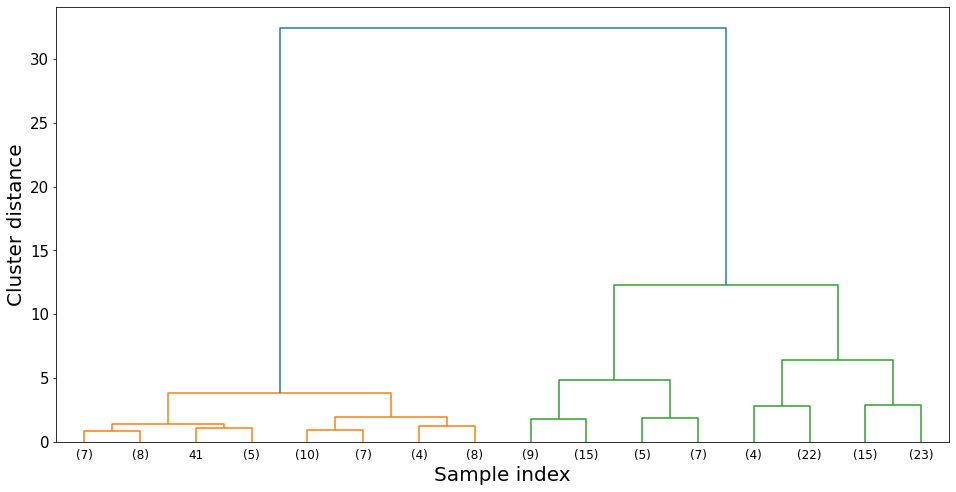

In [6]:
linkage_array = linkage(X,'ward')
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters

# mark the cuts in the tree that signify two or three clusters
plt.figure(figsize=(16, 8))

dendrogram(linkage_array,truncate_mode="level",p=3)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

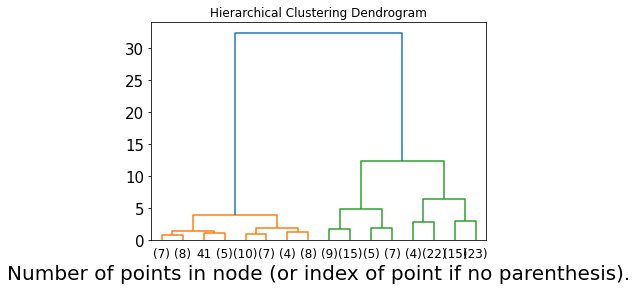

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [24]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=5)

model = model.fit(X)

model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 3, 4, 4, 3, 1, 3, 4, 3,
       4, 4, 4, 2, 2, 4, 4, 3, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 4, 3, 3, 3,
       4, 2, 2, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2], dtype=int64)

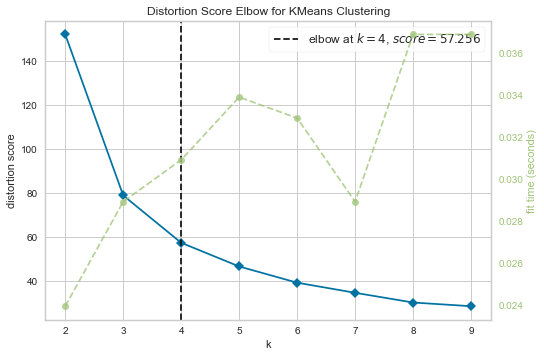

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

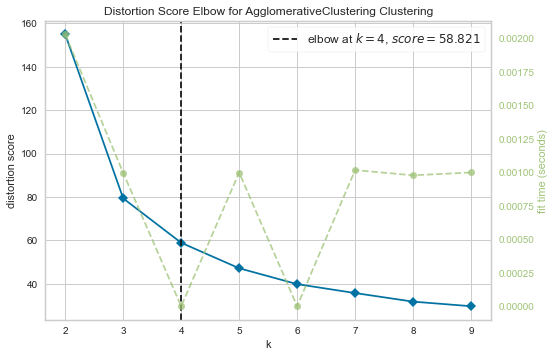

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Elbow Method for AgglomerativeClustering
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

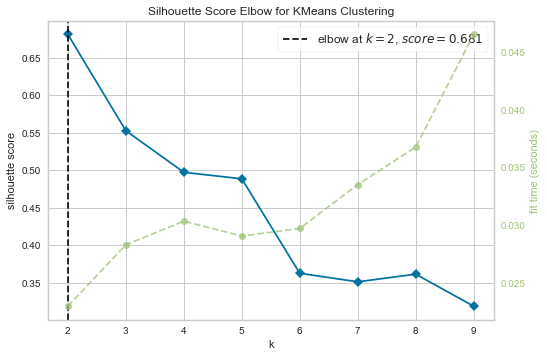

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

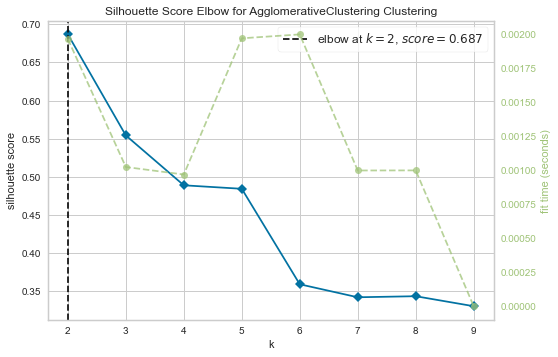

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings=True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

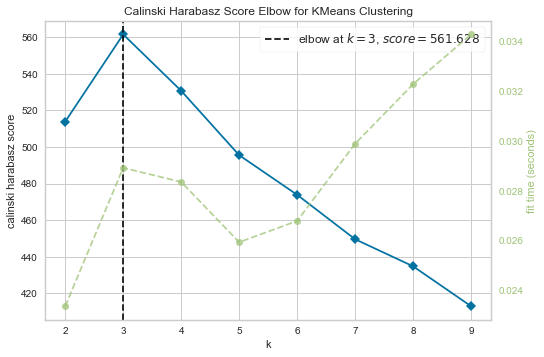

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [22]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

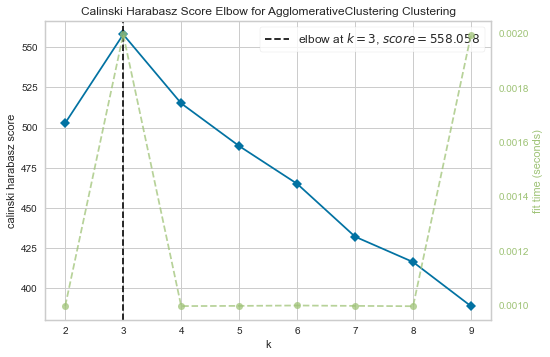

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [23]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure